In [1]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_s_curve
import numpy as py

# 1. 导入数据集

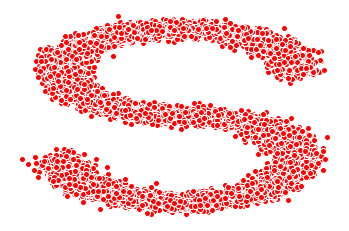

In [26]:
s_curve, _ = make_s_curve(10**4, noise=0.1)
# make_s_curve(n_samples, noise=0.1)
# make_s_curve表示生成S曲线的数据集，n_sample:样本点的数量, noise噪声偏移量
s_curve = s_curve[:, [0, 2]] / 10.0
data = s_curve.T
fig, ax = plt.subplots()
ax.scatter(*data, color="red", edgecolors="white")
ax.axis("off")
dataset = torch.tensor(s_curve).float()

# 2 确定超参数的值
$$
\beta \\
\alpha = 1 - \beta \\
\bar{\alpha} = \alpha_1 * \alpha_2 * \cdots  * \alpha_T
$$

In [29]:
num_step = 100
# 制定每一步的beta
betas = torch.linspace(-6, 6, num_step)
betas = torch.sigmoid(betas) * (0.5e-2 - 1e-5) + 1e-5   # betas的值一般比较小
alphas = 1 - betas
alphas_prod = torch.cumprod(alphas)

In [30]:
betas

tensor([2.2338e-05, 2.3924e-05, 2.5713e-05, 2.7730e-05, 3.0006e-05, 3.2572e-05,
        3.5466e-05, 3.8729e-05, 4.2407e-05, 4.6552e-05, 5.1224e-05, 5.6487e-05,
        6.2414e-05, 6.9089e-05, 7.6601e-05, 8.5055e-05, 9.4563e-05, 1.0525e-04,
        1.1726e-04, 1.3075e-04, 1.4589e-04, 1.6286e-04, 1.8188e-04, 2.0317e-04,
        2.2698e-04, 2.5358e-04, 2.8325e-04, 3.1630e-04, 3.5306e-04, 3.9387e-04,
        4.3908e-04, 4.8906e-04, 5.4419e-04, 6.0482e-04, 6.7132e-04, 7.4400e-04,
        8.2317e-04, 9.0908e-04, 1.0019e-03, 1.1018e-03, 1.2087e-03, 1.3225e-03,
        1.4431e-03, 1.5700e-03, 1.7028e-03, 1.8409e-03, 1.9836e-03, 2.1298e-03,
        2.2788e-03, 2.4294e-03, 2.5806e-03, 2.7312e-03, 2.8802e-03, 3.0264e-03,
        3.1691e-03, 3.3072e-03, 3.4400e-03, 3.5669e-03, 3.6875e-03, 3.8013e-03,
        3.9082e-03, 4.0081e-03, 4.1009e-03, 4.1868e-03, 4.2660e-03, 4.3387e-03,
        4.4052e-03, 4.4658e-03, 4.5209e-03, 4.5709e-03, 4.6161e-03, 4.6569e-03,
        4.6937e-03, 4.7267e-03, 4.7564e-